In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

import utils
import model_env as me

In [113]:
fnames=[
    # First worm
    'Data/traj12-11-2020_19-04-41.pkl', #none
    'Data/traj12-11-2020_19-14-38.pkl', #none
    'Data/traj12-11-2020_19-24-30.pkl', #xlim 800
    # 'Data/traj12-11-2020_19-35-31.pkl', #none # Seems like an especially bad dataset. Actually ruined all the others
    # Second worm
    'Data/traj12-11-2020_19-55-19.pkl', #none
    'Data/traj12-11-2020_20-05-11.pkl', #none
    'Data/traj12-11-2020_20-15-17.pkl', #none
    'Data/traj12-11-2020_20-25-06.pkl', #xlim 1430
]

xlims = [1e6,1e6,800,1e6,1e6,1e6,1430]

traj_df = utils.make_df(fnames,xlimit=xlims,time_steps=10)

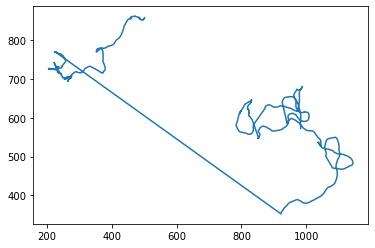

In [66]:
locs = np.zeros((traj_df['loc'].size,2))
for i,loc in enumerate(traj_df['loc']):
    locs[i,:] = loc
plt.plot(locs[:,0],locs[:,1])

In [114]:
dist_dict = utils.make_dist_dict(traj_df)

In [68]:
def true_policy(prod):
    if prod<0:
        action = 1
    else:
        action = 0
    return action

def on_policy(prod):
    return 1

def worst_policy(prod):
    if prod<0:
        action = 0
    else:
        action = 1
    return action

def off_policy(prod):
    return 0

In [115]:
def test_policy(policy,dist_dict):
    toy_worm = me.FakeWorm(dist_dict)
    steps = 1000000 # 1 mil steps
    eps = 1

    rews = []
    for ep in range(eps):
        obs = np.zeros((steps,2))
        rew = np.zeros(steps)
        action = 0
        for i in range(steps):
            obs[i,:],rew[i],done,info = toy_worm.step(action)
            prod = np.sign(obs[i,0]*obs[i,1])
            action = policy(prod)
        rews.append(np.mean(rew))
    return np.array(rews)

In [116]:
true_pol = test_policy(true_policy,dist_dict)
print('True done')
worst_pol = test_policy(worst_policy,dist_dict)
print('Worst done')
on_pol = test_policy(on_policy,dist_dict)
print('On done')
off_pol = test_policy(off_policy,dist_dict)

True done
Worst done
On done


# Testing policies we'd use on actual worms

### Second worm all data

True: 3.897350249438305

Worst: -0.4533528468463348

On: 0.9267479848525118

Off: 2.2718444524218326

### Second worm first 20 min of data

True: 2.99614831

Worst: -0.00609434

On: 1.35991373

Off: 1.20012008

### Second worm last 20 min of data

In [31]:
print(f'True: {true_pol}\nWorst: {worst_pol}\nOn: {on_pol}\nOff: {off_pol}')

True: [4.14491307]
Worst: [1.65462017]
On: [2.21595829]
Off: [3.8124937]


### First worm all data, 5 (or 10?) timestep separation

In [58]:
print(f'True: {true_pol}\nWorst: {worst_pol}\nOn: {on_pol}\nOff: {off_pol}')

True: [1.07413698]
Worst: [1.35553076]
On: [1.16124348]
Off: [0.79271937]


### First worm all data, 30 timestep separation between data

In [75]:
print(f'True: {true_pol}\nWorst: {worst_pol}\nOn: {on_pol}\nOff: {off_pol}')

True: [1.04696484]
Worst: [2.50641925]
On: [2.78337636]
Off: [1.40645443]


### First worm first 20 min

In [63]:
print(f'True: {true_pol}\nWorst: {worst_pol}\nOn: {on_pol}\nOff: {off_pol}')

True: [1.95027078]
Worst: [-0.34270528]
On: [1.06486023]
Off: [0.51383332]


### First worm last 20 min

In [71]:
print(f'True: {true_pol}\nWorst: {worst_pol}\nOn: {on_pol}\nOff: {off_pol}')

True: [-0.58155272]
Worst: [-0.00672653]
On: [0.32458791]
Off: [-0.40177312]


### First worm third dataset, no separation between data

In [79]:
print(f'True: {true_pol}\nWorst: {worst_pol}\nOn: {on_pol}\nOff: {off_pol}')

True: [0.57828637]
Worst: [0.22905601]
On: [0.89952426]
Off: [0.3453727]


### First worm fourth dataset, no separation between data

In [83]:
print(f'True: {true_pol}\nWorst: {worst_pol}\nOn: {on_pol}\nOff: {off_pol}')

True: [0.5950837]
Worst: [-0.88287438]
On: [-0.22462305]
Off: [0.08393605]


### First worm fourth dataset, 5 timesteps separation

In [87]:
print(f'True: {true_pol}\nWorst: {worst_pol}\nOn: {on_pol}\nOff: {off_pol}')

True: [-0.91666978]
Worst: [-1.26083376]
On: [-0.2124561]
Off: [0.24202964]


### First worm first three datasets, 5 timesteps separation

In [91]:
print(f'True: {true_pol}\nWorst: {worst_pol}\nOn: {on_pol}\nOff: {off_pol}')

True: [2.06990779]
Worst: [1.45573054]
On: [1.77455079]
Off: [1.49777748]


### All data except bad dataset, 10 timestep separation

In [117]:
print(f'True: {true_pol}\nWorst: {worst_pol}\nOn: {on_pol}\nOff: {off_pol}')

True: [3.05553426]
Worst: [1.38745691]
On: [2.41449813]
Off: [1.78432192]


In [120]:
fnames=[
    # First worm
    'Data/traj12-11-2020_19-04-41.pkl', #none
    'Data/traj12-11-2020_19-14-38.pkl', #none
    'Data/traj12-11-2020_19-24-30.pkl', #xlim 800
    # 'Data/traj12-11-2020_19-35-31.pkl', #none # Seems like an especially bad dataset. Actually ruined all the others
    # Second worm
    'Data/traj12-11-2020_19-55-19.pkl', #none
    'Data/traj12-11-2020_20-05-11.pkl', #none
    'Data/traj12-11-2020_20-15-17.pkl', #none
    'Data/traj12-11-2020_20-25-06.pkl', #xlim 1430
]


xlims = [1e6,1e6,800,1e6,1e6,1e6,1430]
true_pol, worst_pol, on_pol, off_pol = np.zeros(3),np.zeros(3),np.zeros(3),np.zeros(3)
for i,ts in enumerate([5,10,30]):
    traj_df = utils.make_df(fnames,xlimit=xlims,time_steps=ts)
    dist_dict = utils.make_dist_dict(traj_df)
    
    true_pol[i] = test_policy(true_policy,dist_dict)
    print('True done')
    worst_pol[i] = test_policy(worst_policy,dist_dict)
    print('Worst done')
    on_pol[i] = test_policy(on_policy,dist_dict)
    print('On done')
    off_pol[i] = test_policy(off_policy,dist_dict)
    print('Off done')

True done
Worst done
On done
Off done
True done
Worst done
On done
Off done
True done
Worst done
On done
Off done


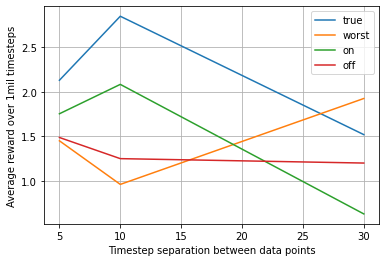

In [112]:
# First worm
xvals = [5,10,30]
plt.plot(xvals,true_pol)
plt.plot(xvals,worst_pol)
plt.plot(xvals,on_pol)
plt.plot(xvals,off_pol)
plt.legend(['true','worst','on','off'])
plt.xlabel('Timestep separation between data points')
plt.ylabel('Average reward over 1mil timesteps')
plt.grid();

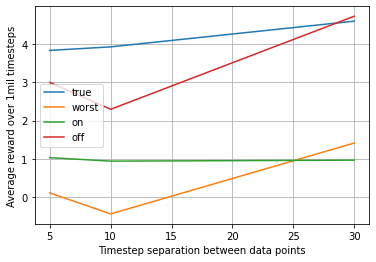

In [119]:
# Second worm
xvals = [5,10,30]
plt.plot(xvals,true_pol)
plt.plot(xvals,worst_pol)
plt.plot(xvals,on_pol)
plt.plot(xvals,off_pol)
plt.legend(['true','worst','on','off'])
plt.xlabel('Timestep separation between data points')
plt.ylabel('Average reward over 1mil timesteps')
plt.grid();

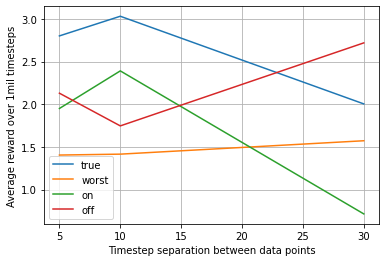

In [121]:
# Both worms
xvals = [5,10,30]
plt.plot(xvals,true_pol)
plt.plot(xvals,worst_pol)
plt.plot(xvals,on_pol)
plt.plot(xvals,off_pol)
plt.legend(['true','worst','on','off'])
plt.xlabel('Timestep separation between data points')
plt.ylabel('Average reward over 1mil timesteps')
plt.grid();